Name: I-Ting Yu, Github: eatingyu0820, USC ID: 5350526235
 (Use one day of my late days)

# HM2 - Combined Cycle Power Plant Data Set
The dataset contains data points collected from a Combined Cycle Power Plant over 6 years (2006-2011), when the power plant was set to work with full load. Features consist of hourly average ambient variables Temperature (T), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electrical energy output (EP) of the plant.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

In [2]:
# ../data/CCPP/Folds5x2_pp.ods
#df = pd.read_excel('/Users/melissayu/Desktop/USC/Fall2022/DS552/HM/HM2/data/CCPP/Folds5x2_pp.xlsx', sheet_name='Sheet1')
df = pd.read_excel('.../data/CCPP/Folds5x2_pp.xlsx', sheet_name='Sheet1')

### (b)Exploring the data:
i. How many rows are in this data set? How many columns? What do the rows and columns represent?

In [3]:
df

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


Answer:
- There are 9568 rows & 5 columns.
- Features consist of hourly average ambient variables Temperature (T), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electrical energy output (EP) of the plant.**

ii. Make pairwise scatterplots of all the varianbles in the data set including the predictors (independent variables) with the dependent variable. Describe your findings.

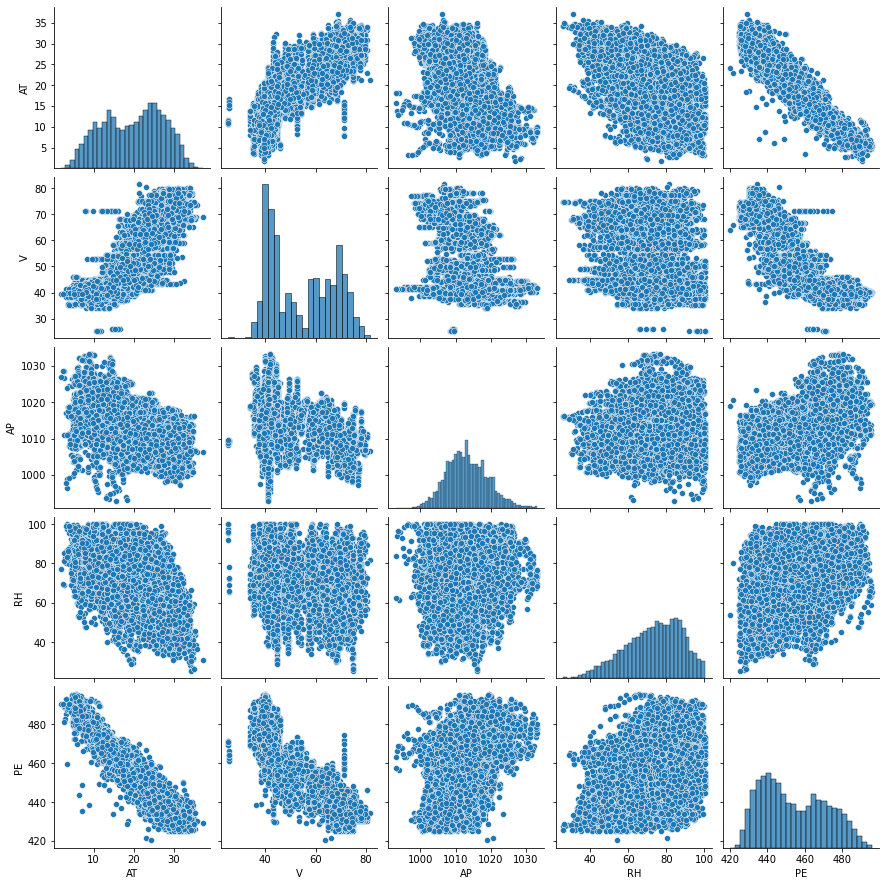

In [4]:
sns.pairplot(df)

Answer:
- For PE & AT, the coefficient is negative.
- For PE & V, the coefficient is negative.
- For PE & AP, the coefficient is positive.
- For PE & RH, the correlation is not obvious to see.


iii. What are the mean, the median, range, first and third quartiles, and in- terquartile ranges of each of the variables in the dataset? Summarize them in a table.

In [5]:
pip install prettytable 

Note: you may need to restart the kernel to use updated packages.


In [6]:
# Create table 
# https://www.geeksforgeeks.org/how-to-make-a-table-in-python/
# using descrbie

from prettytable import PrettyTable
 
# Specify the Column Names while initializing the Table
myTable = PrettyTable(['', 'Temperature(T)', 'Ambient Pressure(AP)', 'Relative Humidity(RH)', 'Exhaust Vacuum(V)'])
 
# Add rows
myTable.add_row(["Mean", df.iloc[:,0].mean(), df.iloc[:,1].mean(), df.iloc[:,2].mean(), df.iloc[:,3].mean()])
myTable.add_row(["Median", df.iloc[:,0].median(), df.iloc[:,1].median(), df.iloc[:,2].median(), df.iloc[:,3].median()])
myTable.add_row(["Range",df.iloc[:,0].max()-df.iloc[:,0].min(), df.iloc[:,1].max()-df.iloc[:,1].min(), df.iloc[:,2].max()-df.iloc[:,2].min(),df.iloc[:,3].max()-df.iloc[:,3].min()])

# Using .qantile()
# https://stackoverflow.com/questions/45926230/how-to-calculate-1st-and-3rd-quartiles
myTable.add_row(["1st quiartiles", df.iloc[:,0].quantile(0.25), df.iloc[:,1].quantile(0.25), df.iloc[:,2].quantile(0.25), df.iloc[:,3].quantile(0.25)])
myTable.add_row(["3rd quartiles", df.iloc[:,0].quantile(0.75), df.iloc[:,1].quantile(0.75), df.iloc[:,2].quantile(0.75), df.iloc[:,3].quantile(0.75)])

Tinter = df.iloc[:,0].quantile(0.75)-df.iloc[:,0].quantile(0.25)
APinter = df.iloc[:,1].quantile(0.75)-df.iloc[:,1].quantile(0.25)
RHinter = df.iloc[:,2].quantile(0.75)-df.iloc[:,2].quantile(0.25)
Vinter = df.iloc[:,3].quantile(0.75)-df.iloc[:,3].quantile(0.25)
myTable.add_row(["Interquartile range", Tinter, APinter, RHinter, Vinter])

myTable



,Temperature(T),Ambient Pressure(AP),Relative Humidity(RH),Exhaust Vacuum(V)
Mean,19.65123118729102,54.30580372073601,1013.2590781772603,73.30897784280926
Median,20.345,52.08,1012.94,74.975
Range,35.3,56.2,40.40999999999997,74.6
1st quiartiles,13.51,41.74,1009.1,63.3275
3rd quartiles,25.72,66.54,1017.26,84.83
Interquartile range,12.209999999999999,24.800000000000004,8.159999999999968,21.502499999999998


### (c) For each predictor, fit a simple linear regression model to predict the response. 
Describe your results. In which of the models is there a statistically significant association between the predictor and the response? Create some plots to back up your assertions. Are there any outliers that you would like to remove from your data for each of these regression tasks?

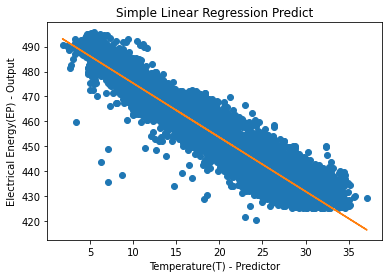

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Sat, 24 Sep 2022   Prob (F-statistic):               0.00
Time:                        16:55:46   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        497.0341      0.156   3177.280      0.0

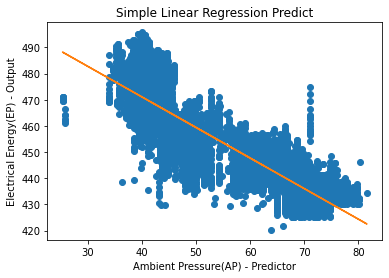

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                 2.972e+04
Date:                Sat, 24 Sep 2022   Prob (F-statistic):               0.00
Time:                        16:55:46   Log-Likelihood:                -33963.
No. Observations:                9568   AIC:                         6.793e+04
Df Residuals:                    9566   BIC:                         6.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        517.8015      0.378   1370.218      0.0

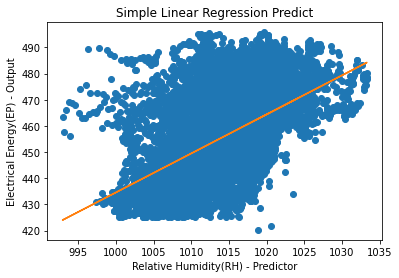

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     3516.
Date:                Sat, 24 Sep 2022   Prob (F-statistic):               0.00
Time:                        16:55:46   Log-Likelihood:                -39224.
No. Observations:                9568   AIC:                         7.845e+04
Df Residuals:                    9566   BIC:                         7.847e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1055.2610     25.459    -41.449      0.0

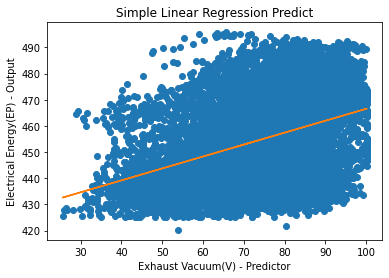

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1714.
Date:                Sat, 24 Sep 2022   Prob (F-statistic):               0.00
Time:                        16:55:46   Log-Likelihood:                -39933.
No. Observations:                9568   AIC:                         7.987e+04
Df Residuals:                    9566   BIC:                         7.988e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        420.9618      0.823    511.676      0.0

In [7]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import statsmodels.api as sm
# reshape(-1,1) => -1 length of rows / 1 length of each subarray
# https://numpy.org/doc/stable/reference/generated/numpy.reshape.html

EP = df.iloc[:,4] #target
xLabel = ['Temperature(T) - Predictor', 'Ambient Pressure(AP) - Predictor', 'Relative Humidity(RH) - Predictor', 'Exhaust Vacuum(V) - Predictor']
simple_linear_coef = list()

for i in range(0,4):
    dataCol = df.iloc[:,i]
    # convert list to array to use .reshape()
    dataArray = np.array(dataCol)
    reshapeDate = dataArray.reshape((-1,1))
    reg = LinearRegression().fit(reshapeDate, EP)
    plt.plot(reshapeDate, EP,'o')
    plt.title('Simple Linear Regression Predict')
    plt.xlabel(xLabel[i])
    plt.ylabel('Electrical Energy(EP) - Output')
    # predict(X) - Predict using the linear model.
    prediction = reg.predict(reshapeDate)
    plt.plot(reshapeDate,prediction,'-')
    plt.show()
    
    # # Fit and summarize OLS model
    x_train = sm.add_constant(dataCol) #constant epsilon (e)
    model = sm.OLS(EP, x_train)
    res = model.fit()
    # paramaters(Coefficient): res.params
    simple_linear_coef.append(res.params[1])
    
    print(res.summary())
    

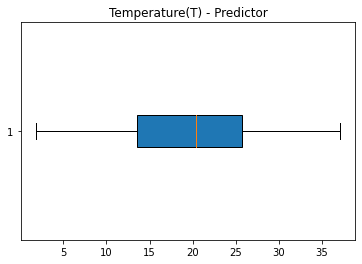

Lower Quartile -4.804999999999998
Upper Quartile 44.035
Outliners:
Series([], Name: AT, dtype: float64)


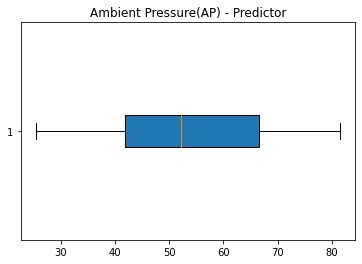

Lower Quartile 4.539999999999999
Upper Quartile 103.74000000000001
Outliners:
Series([], Name: V, dtype: float64)


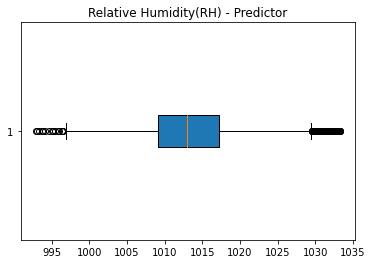

Lower Quartile 996.8600000000001
Upper Quartile 1029.5
Outliners:
238     1030.46
319     1033.25
368     1030.18
536     1031.10
571     1029.65
         ...   
9068     992.89
9159    1031.71
9267    1031.21
9342    1031.32
9366    1030.61
Name: AP, Length: 88, dtype: float64


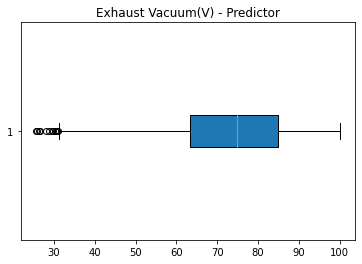

Lower Quartile 31.073750000000004
Upper Quartile 117.08375
Outliners:
789     25.89
2262    28.16
3603    29.43
4367    26.67
6472    29.86
7983    30.59
8061    25.56
8737    30.83
8751    28.81
9015    26.30
9074    30.34
9075    30.99
Name: RH, dtype: float64


In [8]:
# Find the outliners: cooks distance, IQR, box plot are all valid ways of doing
# https://www.simplypsychology.org/boxplots.html#:~:text=When%20reviewing%20a%20box%20plot,whiskers%20of%20the%20box%20plot.&text=For%20example%2C%20outside%201.5%20times,Q3%20%2B%201.5%20*%20IQR).
title = ['Temperature(T) - Predictor', 'Ambient Pressure(AP) - Predictor', 'Relative Humidity(RH) - Predictor', 'Exhaust Vacuum(V) - Predictor']
# df.iloc[:,0].quantile(0.25)
# lowerQuartile = Q3 + 1.5 * IQR
# upperQuartile = Q1 - 1.5 * IQR 
# Tinter = df.iloc[:,0].quantile(0.75)-df.iloc[:,0].quantile(0.25)

for i in range(0,4):
    dataCol = df.iloc[:,i]
    plt.boxplot(dataCol, vert = 0, patch_artist = True)
    plt.title(title[i])
    plt.show()
    
    q1 = df.iloc[:,i].quantile(0.25)
    q3 = df.iloc[:,i].quantile(0.75)
    iqr = q3-q1
    lowerQuartile = q1 - 1.5 * iqr 
    upperQuartile = q3 + 1.5 * iqr
    print('Lower Quartile', lowerQuartile)
    print('Upper Quartile', upperQuartile)
    print('Outliners:')
    # a[a < 12 | a > 30]
    print(dataCol[((dataCol < lowerQuartile) | (dataCol > upperQuartile))])

### (d) Fit a multiple regression model to predict the response using all of the predictors. 
Describe your results. For which predictors can we reject the null hypothesis H0 :βj =0?

#### To reject null hypothesis, there are 2 ways:
- If the absolute value of the t-value is greater than the critical value, you reject the null hypothesis.
- If the p-value of the hypothesis test is less than some significance level (e.g. α = . 05), then we reject the null hypothesis.

#### OLS Notes:
- const coef = alpha
- others coef = beta
- p>|t| = p-value
- The R-squared of the regression is the fraction of the variation in your dependent variable that is accounted for (or predicted by) your independent variables.
- The P value tells you how confident you can be that each individual variable has some correlation with the dependent variable, which is the important thing.

In [9]:
# statsmodel_OLS - https://www.statsmodels.org/dev/regression.html
multi_linear_coef = list()

train_data = df.iloc[:,:-1]
test_data = df.iloc[:,-1]
regModel = LinearRegression().fit(train_data, test_data)
prediction = regModel.predict(train_data)

train_data = sm.add_constant(train_data)
modelOLS = sm.OLS(test_data, train_data)
res = modelOLS.fit()
prediction = res.predict(train_data)

for i in range(1, len(res.params)):
    multi_linear_coef.append(res.params[i])

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Sat, 24 Sep 2022   Prob (F-statistic):               0.00
Time:                        16:55:46   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        454.6093      9.749     46.634      0.0

#### Answer:
- We rejects all the predictors because all the predictors' p-value is less than 0.05



### (e) How do your results from 1c compare to your results from 1d? 
Create a plot displaying the univariate regression coefficients from 1c on the x-axis, and the multiple regression coefficients from 1d on the y-axis. That is, each predictor is displayed as a single point in the plot. Its coefficient in a simple linear regression model is shown on the x-axis, and its coefficient estimate in the multiple linear regression model is shown on the y-axis.

In [10]:
print(simple_linear_coef)
print(multi_linear_coef)

[-2.1713199585178047, -1.1681351265557107, 1.4898716733991129, 0.45565010226298014]
[-1.9775131066353864, -0.2339164225825025, 0.06208294378084911, -0.15805410291641003]


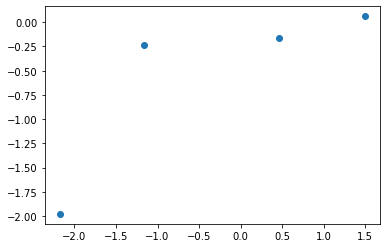

In [11]:
plt.scatter(simple_linear_coef, multi_linear_coef)
plt.show()

### (f) Is there evidence of nonlinear association between any of the predictors and the response? 
To answer this question, for each predictor X, fit a model of the form (2

                        Y =β0 +β1X+β2X^2 +β3X^3 +ε

2: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

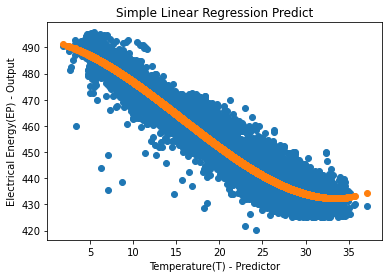

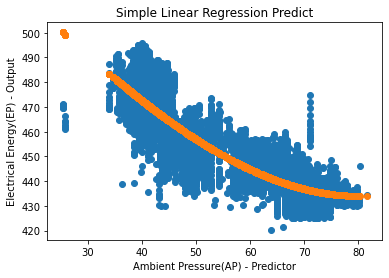

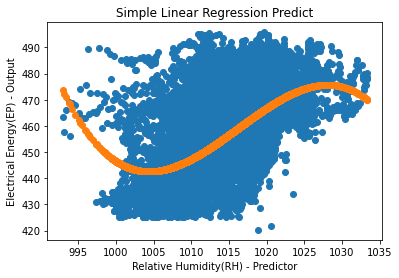

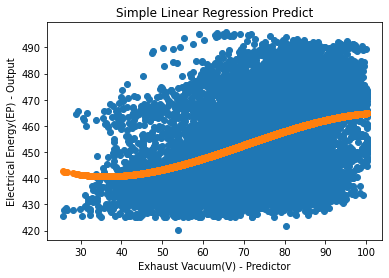

In [12]:
from sklearn.preprocessing import PolynomialFeatures

EP = df.iloc[:,4] #target
for i in range(0,4):
    dataCol = df.iloc[:,i]
    # convert list to array to use .reshape()
    dataArray = np.array(dataCol)
    X = dataArray.reshape((-1,1))
    poly = PolynomialFeatures(3) #power 3
    polyData = poly.fit_transform(X)
    
    reg = LinearRegression().fit(polyData, EP)
    plt.plot(dataCol, EP,'o')
    plt.title('Simple Linear Regression Predict')
    plt.xlabel(xLabel[i])
    plt.ylabel('Electrical Energy(EP) - Output')
    # predict(X) - Predict using the linear model.
    prediction = reg.predict(polyData)
    plt.plot(X,prediction,'o')
    plt.show()

### (g) Is there evidence of association of interactions of predictors with the response? 
To answer this question, run a full linear regression model with all pairwise interaction terms and state whether any interaction terms are statistically significant.


In [13]:
from sklearn.preprocessing import PolynomialFeatures

X = df.iloc[:,:4] 
y = df.iloc[:,4] #target

#dataArray = np.array(X)
# parawise: degree = 2
polyModel = PolynomialFeatures(2, interaction_only=True) 
polyFeature = polyModel.fit_transform(X)
polyFeature = pd.DataFrame(polyFeature, columns = polyModel.get_feature_names_out())

polyFeature = sm.add_constant(polyFeature)
modelOLS = sm.OLS(y, polyFeature).fit()
#res = modelOLS.fit()
prediction = modelOLS.predict(polyFeature)
print(modelOLS.summary())

print('\n*************************************************************')
#print('Interaction terms are statistically significant when P-Value < 0.05:\n< AT V, AT RH, V AP, AP RH >')
print("All pairwise interactionterms:")
print(polyModel.get_feature_names_out())


                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Sat, 24 Sep 2022   Prob (F-statistic):               0.00
Time:                        16:55:47   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
1            685.7825     78.640      8.721      0.0

### Answer:
Interaction terms are statistically significant when P-Value < 0.05:
- AT V, AT RH, V AP, AP RH 

### (h) Can you improve your model using possible interaction terms or nonlinear associations between the predictors and response? 
Train the regression model on a randomly selected 70% subset of the data with all predictors. Also, run a regression model involving all possible interaction terms and quadratic nonlinearities, and remove insignificant variables using p-values (be careful about interaction terms). Test both models on the remaining points and report your train and test MSEs.

In [14]:
# MSE:
# https://www.geeksforgeeks.org/python-mean-squared-error/
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html

# Multi Linear Regression
multi_linear_coef = list()
train_data = df.iloc[:,:-1]
test_data = df.iloc[:,-1]

regModel = LinearRegression().fit(train_data, test_data)
prediction = regModel.predict(train_data)
train_data = sm.add_constant(train_data)
modelOLS = sm.OLS(test_data, train_data)
res = modelOLS.fit()
prediction = res.predict(train_data)

for i in range(1, len(res.params)):
    multi_linear_coef.append(res.params[i])
print(res.summary())
model_mse_h1 = mean_squared_error(test_data, prediction)
print("\n========================== Multi Linear Regression ===========================")
print("MSE:", model_mse_h1)
print("==============================================================================")


                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Sat, 24 Sep 2022   Prob (F-statistic):               0.00
Time:                        16:55:47   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        454.6093      9.749     46.634      0.0

In [15]:
# Polynomial regreesion before removing insignificant value (p>0.05)
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

X= df.iloc[:,:4] 
y = df.iloc[:,4]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=None)
polyModel = PolynomialFeatures(2, interaction_only=True) 
polyX = polyModel.fit_transform(X_train)
Xtest = polyModel.fit_transform(X_test)
polyX = sm.add_constant(polyX)
model = sm.OLS(y_train, polyX)
res = model.fit()

# .predict(test) always use test for prediction
predict = res.predict(Xtest)
# mse always calculate 2 test data not training data
model_mse_h2 = mean_squared_error(y_test, predict)
print(res.summary())
print("\n================== Polynomial regreesion before removing ===================")
# print(featureName)
print("MSE:", model_mse_h2)
print("==============================================================================")

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     9741.
Date:                Sat, 24 Sep 2022   Prob (F-statistic):               0.00
Time:                        16:55:47   Log-Likelihood:                -19320.
No. Observations:                6697   AIC:                         3.866e+04
Df Residuals:                    6686   BIC:                         3.874e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        707.2243     94.999      7.445      0.0

In [16]:
# Backward elimination with detailed explanation:
# https://medium.com/mlearning-ai/short-python-code-for-backward-elimination-with-detailed-explanation-52894a9a7880from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

X= df.iloc[:,:4] 
y = df.iloc[:,4]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
polyModel = PolynomialFeatures(2, interaction_only=False) 
polyX = polyModel.fit_transform(X_train)
Xtest = polyModel.fit_transform(X_test)
polyX = sm.add_constant(polyX)
# remove insignificant value for both X_train & X_test
remove_polyX = polyX[:, [0,1,3,4,5,6,8,12,13,14]]
remove_Xtest = Xtest[:, [0,1,3,4,5,6,8,12,13,14]]
model = sm.OLS(y_train, remove_polyX)
res = model.fit()
featureName = polyModel.get_feature_names_out()
featureName = np.delete(featureName, [2,7,9,10,11])

predict = res.predict(remove_Xtest)
model_mse_h3 = mean_squared_error(y_test, predict)
print(res.summary())
# print(featureName)
print("\n================== Polynomial regreesion After removing ===================")
print("MSE:", model_mse_h3)
print("==============================================================================")

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.095e+04
Date:                Sat, 24 Sep 2022   Prob (F-statistic):               0.00
Time:                        16:55:47   Log-Likelihood:                -19265.
No. Observations:                6697   AIC:                         3.855e+04
Df Residuals:                    6687   BIC:                         3.862e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -9657.0380   1106.254     -8.729      0.0

### (i) KNN Regression:
i. Perform k-nearest neighbor regression for this dataset using both normalized and raw features. Find the value of k ∈ {1,2,...,100} that gives you the best fit. Plot the train and test errors in terms of 1/k.

Raw Best K-value:  0.2
error: 0.05364592369711796


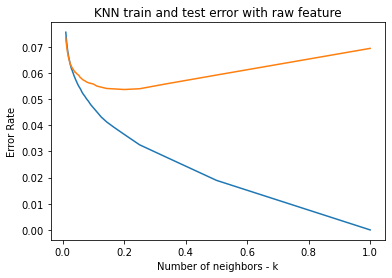

In [17]:
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split


test_error = []
train_error = []
knn_value = []
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X, y, train_size=0.7, random_state=42)

for i in range (1, 101):
    neigh = KNeighborsRegressor(n_neighbors=i)
    neigh.fit(X_train_r, y_train_r)
   
    train_error.append(1 - neigh.score(X_train_r, y_train_r))
    test_error.append(1 - neigh.score(X_test_r, y_test_r))
    knn_value.append(1/i)

min_error_i1 = min(test_error)
best_k = knn_value[test_error.index(min_error_i1)]
print("Raw Best K-value: ", best_k)
print("error:", min_error_i1)

plt.title('KNN train and test error with raw feature')  
plt.plot(knn_value, train_error, label ='Training Error Rate')
plt.plot(knn_value, test_error, label = 'Test Error Rate')
plt.xlabel('Number of neighbors - k')
plt.ylabel('Error Rate')
plt.show()

Normalized Best K-value:  0.25
Normalized Error rate: 0.04894484562993062


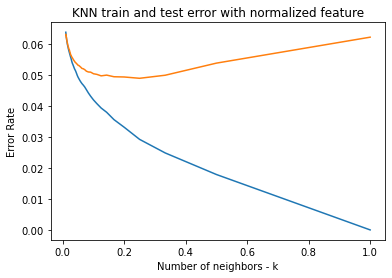

In [18]:
test_error = []
train_error = []
knn_value = []

X= df.iloc[:,:4] 
y = df.iloc[:,4]

X_normalized = (X-X.min())/(X.max()-X.min())
y_normalized = (y-y.min())/(y.max()-y.min())
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y_normalized, train_size=0.7, random_state=42)


for i in range (1, 101):
    neigh = KNeighborsRegressor(n_neighbors=i)
    neigh.fit(X_train, y_train)
   
    train_error.append(1 - neigh.score(X_train, y_train))
    test_error.append(1 - neigh.score(X_test, y_test))
    #test_error.append(1 - neigh.score(X_test, y_test))
    knn_value.append(1/i)

min_error_i2 = min(test_error)
best_k = knn_value[test_error.index(min_error_i2)]
print("Normalized Best K-value: ", best_k)
print("Normalized Error rate:", min_error_i2)

plt.title('KNN train and test error with normalized feature')  
plt.plot(knn_value, train_error, label = 'Training Error Rate')
plt.plot(knn_value, test_error, label = 'Test Error Rate')
plt.xlabel('Number of neighbors - k')
plt.ylabel('Error Rate')
plt.show()

### (j) Compare the results of KNN Regression with the linear regression model that has the smallest test error and provide your analysis.


In [19]:
print("========================= Multi Linear Regression ===========================")
print("MSE:", model_mse_h1)

print("================== Polynomial regreesion before removing ===================")
print("MSE:", model_mse_h2)

print("================== Polynomial regreesion After removing ===================")
print("MSE:", model_mse_h3)

print("============================= KNN regression ==============================")
print("Raw Error rate:", min_error_i1)
print("Normalized Error rate:", min_error_i2)


========================= Multi Linear Regression ===========================
MSE: 20.76739753253501
================== Polynomial regreesion before removing ===================
MSE: 18.080471625994484
================== Polynomial regreesion After removing ===================
MSE: 19.221018954932802
============================= KNN regression ==============================
Raw Error rate: 0.05364592369711796
Normalized Error rate: 0.04894484562993062


#### Answer for analysis:
- From the results of different regression methods, we could find using KNN regression with Normalized data would provide lowest error rate. 
- Because the point we chose for knn is the best k value which is the closest point to the regression line.

### 2. ISLR: 2.4.1


For each of parts (a) through (d), indicate whether we would generally expect the performance of a flexible statistical learning method to be better or worse than an inflexible method. Justify your answer.

(a) The sample size n is extremely large, and the number of predictors p is small.
- **Answer:** We would have sufficient information about each predictor. It is better than inflexible method because the flexible method will work better when having large n sample size (reduces the risk of overfitting).

(b) The number of predictors p is extremely large, and the number of observations n is small.
- **Answer:** Worst. Because if we choose flexible method in this case, it would overfit the model due to smalller number of observations.

(c) The relationship between the predictors and response is highly non-linear.
- **Answer:** Flexible method would fit better with more degrees of freedom and it would has less bias. 

(d) The variance of the error terms, i.e. σ2 = Var(), is extremely high.
- **Answer:** Worst. To avoid the overfitting and increase the variance, the inflexible method would be a better choice.


### 3. ISLR: 2.4.7


The table below provides a training data set containing six observations, three predictors, and one qualitative response variable.

a) Compute the Euclidean distance between each observation and the test point, X1=X2=X3=0
- Euclidean distance formula: dist((x,y),(a,b))=sqrt((x-a)²+(y-b)²)

In [20]:
import math
pts = [[0,3,0],[2,0,0],[0,1,3],[0,1,2],[-1,0,1],[1,1,1]]
for i in range(0,len(pts) ):
    distance = math.sqrt((0-pts[i][0])**2+(0-pts[i][1])**2+(0-pts[i][2])**2)
    print(str(i+1)+"th point ",distance)

1th point  3.0
2th point  2.0
3th point  3.1622776601683795
4th point  2.23606797749979
5th point  1.4142135623730951
6th point  1.7320508075688772


(b) What is our prediction with K = 1? Why?
- **Answer:** For K=1, the nearest neighbor is [-1,0,1] with lable(Y) Green (our prediction).

(c) What is our prediction with K = 3? Why?
- **Answer:** For K=3, the 3 nearest neighbors are [-1,0,1][1,1,1][2,0,0] with lables(Y) Green, Red and Red. We predict Red because of more red. 

(d) If the Bayes decision boundary in this problem is highly nonlinear, then would we expect the best value for K to be large or small? Why?
- **Answer:** When K becomes larger, the boundary becomes inflexible (linear). So in this case we would expect the best value for K to be small.